<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/master/03-Deep-Learning/notebooks/Tarea-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modulo 3: Deep Learning - Tarea 2

In [1]:
import tensorflow as tf

print('GPU presente en: {}'.format(tf.test.gpu_device_name()))

2023-07-02 01:05:41.794220: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


GPU presente en: 


2023-07-02 01:05:43.201069: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

# Tarea 2: X-rays
































Este conjunto de entrenamiento consta de 5886 imágenes de rayos X de torax divididas en dos clases: Pneumonia y Normal.

Estas imágenes de radiografía de tórax son de pacientes pediátricos de uno a cinco años del Centro Médico de Mujeres y Niños de Guangzhou, Guangzhou. Todas las radiografías de tórax se realizaron como parte de la atención clínica rutinaria de los pacientes.

Para el análisis de las imágenes, se sometieron inicialmente a un control de calidad mediante la eliminación de todas las exploraciones de baja calidad o ilegibles. A continuación, los diagnósticos de las imágenes fueron calificados por dos médicos expertos antes de ser autorizados para el entrenamiento del sistema de IA. Para tener en cuenta cualquier error de clasificación, el conjunto de evaluación también fue revisado por un tercer experto.

Este conjunto de datos se puede encontrar en [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia).

La copia con la que trabajaremos se puede bajar de Google Drive: https://drive.google.com/file/d/1jbkvQB4L5y3UKkPurNp6nJonSoYbcYbI/view?usp=sharing

In [3]:
#!pip install -q gdown

In [4]:
#!gdown 1jbkvQB4L5y3UKkPurNp6nJonSoYbcYbI

Extraemos los archivos

In [5]:
from zipfile import ZipFile

fname = './x-rays.zip'

#with ZipFile(fname, 'r') as myzip:
#    myzip.extractall()
#    print('Listo')

Definimos las rutas de los archivos

In [6]:
train_dir = 'x-rays/train'
validation_dir = 'x-rays/val'
test_dir = 'x-rays/test'

Graficamos algunas instancias de cada clase

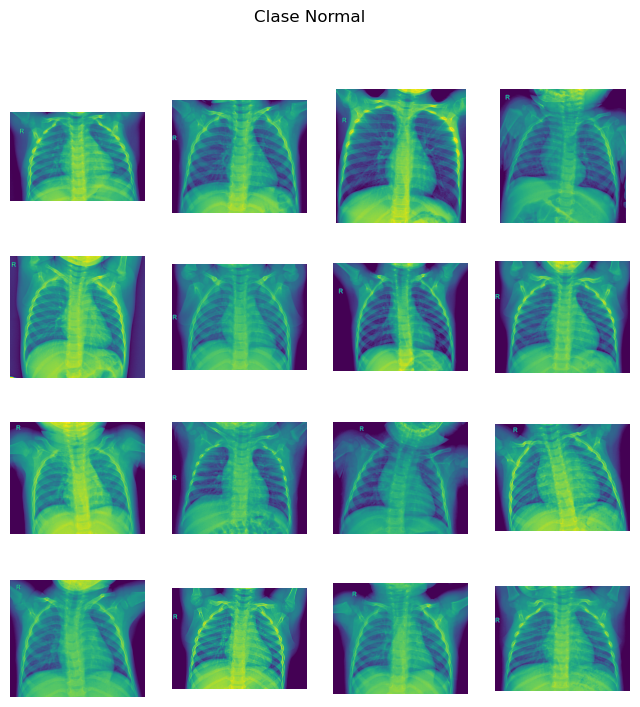

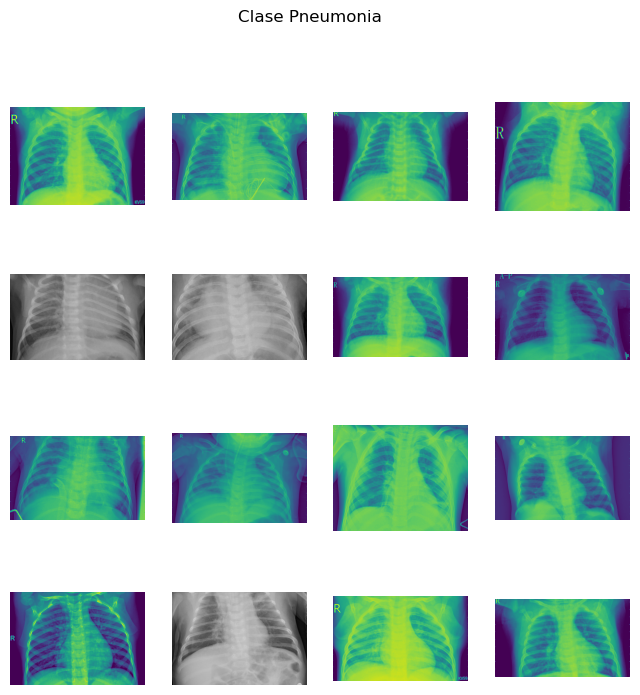

In [7]:
import pathlib
import PIL
import matplotlib.pyplot as plt

train_path = pathlib.Path(train_dir)

normal_vis = list(train_path.glob("NORMAL/*.jpeg"))

plt.figure(figsize = (8,8))
plt.suptitle("Clase Normal")
for i in range(16):
    plt.subplot(4, 4, i + 1)
    img = PIL.Image.open(str(normal_vis[i]))
    plt.imshow(img)
    plt.axis(False)
plt.show()

pneumonia_vis = list(train_path.glob("PNEUMONIA/*.jpeg"))

plt.figure(figsize = (8,8))
plt.suptitle("Clase Pneumonia")
for i in range(16):
    plt.subplot(4, 4, i + 1)
    img = PIL.Image.open(str(pneumonia_vis[i]))
    plt.imshow(img)
    plt.axis(False)
plt.show()

In [8]:
import os, shutil

print('Para entrenamiento:')
train_normal = os.path.join(train_dir,'NORMAL')
print(f"{len(os.listdir(train_normal))} Normal.")
train_pneumonia = os.path.join(train_dir,'PNEUMONIA')
print(f"{len(os.listdir(train_pneumonia))} Pneumonia.")

print('\nPara validación:')
validation_normal = os.path.join(validation_dir,'NORMAL')
print(f"{len(os.listdir(validation_normal))} Normal.")
validation_pneumonia = os.path.join(validation_dir,'PNEUMONIA')
print(f"{len(os.listdir(validation_pneumonia))} Pneumonia.")

print('\nPara prueba:')
test_normal = os.path.join(test_dir,'NORMAL')
print(f"{len(os.listdir(test_normal))} Normal.")
test_pneumonia = os.path.join(test_dir,'PNEUMONIA')
print(f"{len(os.listdir(test_pneumonia))} Pneumonia.")

Para entrenamiento:
1341 Normal.
3875 Pneumonia.

Para validación:
9 Normal.
8 Pneumonia.

Para prueba:
234 Normal.
391 Pneumonia.


In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(256,256),
        batch_size=32, # <-------- Este número lo usarás en la siguiente celda
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(256,256),
        batch_size=8, # <-------- Este número lo usarás en la siguiente celda
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(256,256),
        batch_size=16,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 19 images belonging to 2 classes.
Found 627 images belonging to 2 classes.


⭕ ¿Cuántos lotes hay que pasar para recorrer todo el conjunto de entrenamiento por cada época? ¿cuántos para recorrer todo el conjunto de validación?

In [10]:
steps_per_epoch = 5216/32 # calcula este número
steps_per_epoch = int(steps_per_epoch)
validation_steps = 19/8# calcula este número
validation_steps = int(validation_steps)

print(f"Número de lotes para recorrer el conjunto de entrenamiento: {steps_per_epoch}")
print(f"Número de lotes para recorrer el conjunto de validación: {validation_steps}")

Número de lotes para recorrer el conjunto de entrenamiento: 163
Número de lotes para recorrer el conjunto de validación: 2


##  El modelo

⭕ Define un módelo de red neuronal CNN para la tarea de clasificación binaria de este conjunto de datos. Puedes usar dropout, el número de capas, épocas y activaciones que consideres necesario.

Al final, reporta las métrica Accuracy.

In [11]:
# model =
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(50, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(60, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(80, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


⭕ Define un callback `EarlyStopping` llamado `e_stopping` para detener el entrenamiento si comienza el overfitting. Puedes experimentar con el hiper-parámetro `patience`

In [12]:
from scikeras.wrappers import KerasClassifier
from keras.callbacks import EarlyStopping

e_stopping = EarlyStopping(monitor='val_loss',patience=5)

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 50)      14450     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 50)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 60)        27060     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 60)       0

Realiza el entrenamiento del modelo

In [13]:
num_epocas = 100

history = model.fit(
      train_generator,
      steps_per_epoch=steps_per_epoch,
      epochs=num_epocas,
      validation_data=validation_generator,
      validation_steps=validation_steps,
      callbacks=[e_stopping])

Epoch 1/100
163/163 [==============================] - 176s 1s/step - loss: 0.4297 - accuracy: 0.8071 - val_loss: 0.5080 - val_accuracy: 0.6250
Epoch 2/100
163/163 [==============================] - 178s 1s/step - loss: 0.1713 - accuracy: 0.9337 - val_loss: 0.6859 - val_accuracy: 0.6250
Epoch 3/100
163/163 [==============================] - 178s 1s/step - loss: 0.1298 - accuracy: 0.9505 - val_loss: 0.2328 - val_accuracy: 0.8750
Epoch 4/100
163/163 [==============================] - 178s 1s/step - loss: 0.1020 - accuracy: 0.9615 - val_loss: 0.3567 - val_accuracy: 0.9375
Epoch 5/100
163/163 [==============================] - 178s 1s/step - loss: 0.0936 - accuracy: 0.9640 - val_loss: 0.1595 - val_accuracy: 1.0000
Epoch 6/100
163/163 [==============================] - 178s 1s/step - loss: 0.0845 - accuracy: 0.9684 - val_loss: 0.0920 - val_accuracy: 1.0000
Epoch 7/100
163/163 [==============================] - 179s 1s/step - loss: 0.0847 - accuracy: 0.9693 - val_loss: 1.0537 - val_accuracy:

Evalua el desempeño de tu modelo usando el conjunto de entrenamiento.

In [16]:
score = model.evaluate(test_generator)
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1]*100, 2))

40/40 [==============================] - 7s 164ms/step - loss: 0.8433 - accuracy: 0.7879
Test loss: 0.843
Test accuracy: 78.79


⭕ Grafica las curvas de entrenamiento de loss y accuracy

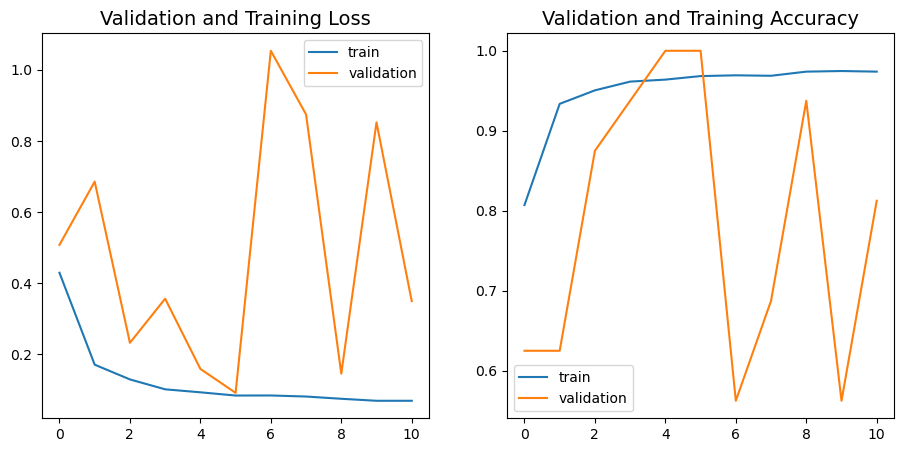

In [18]:
#model.evaluate(validation_generator)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# ---- graficamos la función de perdida ----
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.title("Validation and Training Loss",fontsize=14)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
# ---- graficamos la métrica de rendimiento ----
plt.subplot(1,2,2)
plt.title("Validation and Training Accuracy",fontsize=14)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()